In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv('../Datasets/TimeSeries/daily-total-female-births-CA.csv')

In [3]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
dataframe['date'].dtype

dtype('O')

### Loading Data with Parse_dates

In [5]:
df2 = pd.read_csv('../Datasets/TimeSeries/daily-total-female-births-CA.csv', header=0, parse_dates=[0])

In [6]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
df2['date'].dtype

dtype('<M8[ns]')

### In cases when there is problem loading date time data
    we use dateparse in that time
    dateparse = lambda x pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
    df = pd.read_csv(............parse_dates=[0], date_parser=dateparse)  ---> here [0] is the column number where date is assigned in database

### Loading data as a Series

In [8]:
series = pd.read_csv('../Datasets/TimeSeries/daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0,squeeze=True)

In [9]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

### In series we have indexes as  time series data and valus corresponding to those indexes is the value of our series
In dataframe we have numerical indexes

### Exploring Time Series Data

In [10]:
series.shape

(365,)

In [11]:
df2.shape

(365, 2)

### Querying by time

In [12]:
print(series["1959-01"])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [15]:
df2[(df2['date'] > '1959-01-01') & (df2['date'] <= '1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


### Descriptive Statistics

In [16]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [17]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


### Time Series - Data Visualization

In [18]:
from matplotlib import pyplot as plt

In [19]:
%matplotlib inline

In [20]:
Dataviz_df = df2.copy()

In [21]:
Dataviz_df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


<AxesSubplot:>

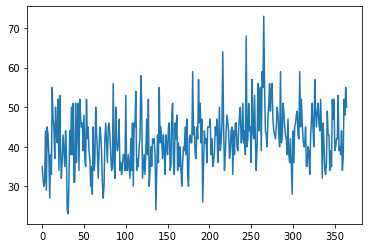

In [22]:
Dataviz_df['births'].plot()

In [23]:
Dataviz_df.index = Dataviz_df['date']

<AxesSubplot:xlabel='date'>

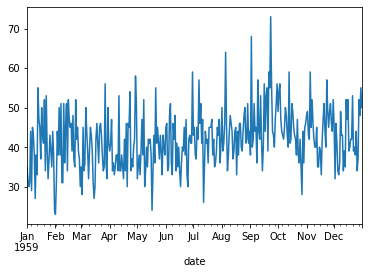

In [24]:
Dataviz_df['births'].plot()

### Zooming In

In [25]:
Dataviz_df2 = Dataviz_df[(Dataviz_df['date'] > '1959-01-01') & (Dataviz_df['date'] <= '1959-01-10')].copy()

In [26]:
Dataviz_df2

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38
1959-01-10,1959-01-10,27


<AxesSubplot:xlabel='date'>

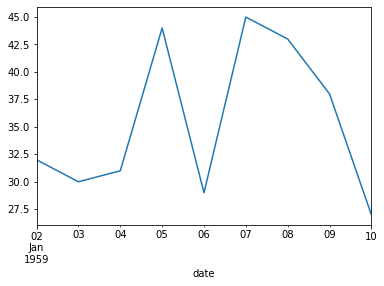

In [27]:
Dataviz_df2['births'].plot()

### Trendline

In [28]:
import seaborn as sns

<AxesSubplot:ylabel='births'>

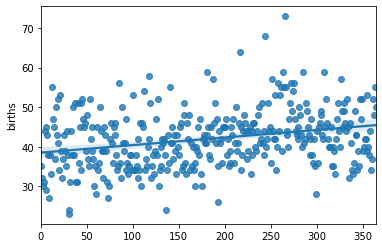

In [29]:
sns.regplot(x= df2.index.values, y = df2['births'] )

<AxesSubplot:ylabel='births'>

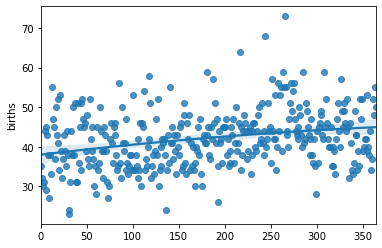

In [30]:
sns.regplot(x= df2.index.values, y = df2['births'], order=2 )

In [31]:
miles_df = pd.read_csv('../Datasets/TimeSeries/us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [32]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<AxesSubplot:>

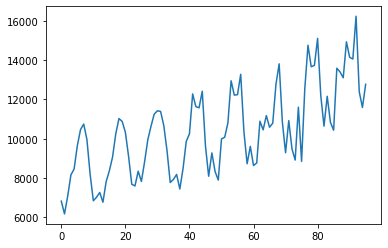

In [33]:
miles_df['MilesMM'].plot()

<AxesSubplot:ylabel='MilesMM'>

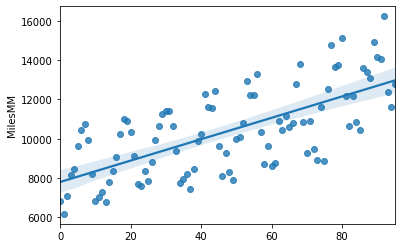

In [35]:
sns.regplot(x= miles_df.index.values, y = miles_df['MilesMM'] )

### Removing Seasonality

In [36]:
miles_df['year'] = miles_df['Month'].dt.year

In [37]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [38]:
miles_df.groupby('year').mean()

,MilesMM
year,
1963,8300.250000
1964,8849.333333
1965,9619.250000
1966,9929.500000
1967,10542.916667
1968,10747.916667
1969,11972.000000
1970,13124.750000


<AxesSubplot:xlabel='year'>

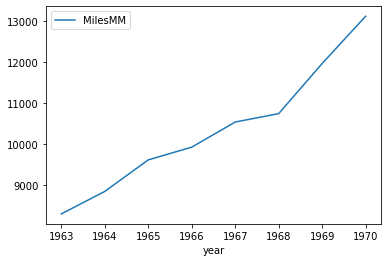

In [39]:
miles_df.groupby('year').mean().plot()

### Creating Lag Plots

In [40]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [41]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<AxesSubplot:xlabel='lag1', ylabel='MilesMM'>

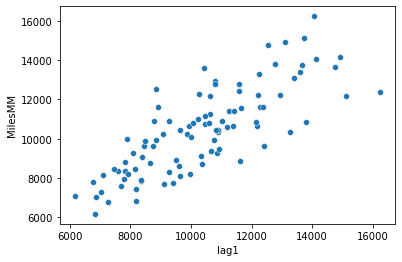

In [42]:
sns.scatterplot(x=miles_df['lag1'], y=miles_df['MilesMM'])

In [43]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

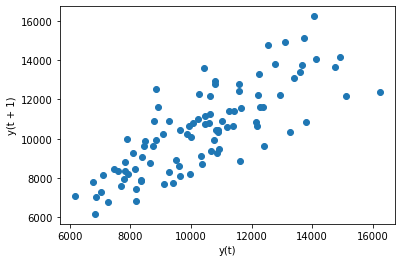

In [44]:
lag_plot(miles_df['MilesMM'])

### Autocorrelation Plots

In [45]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

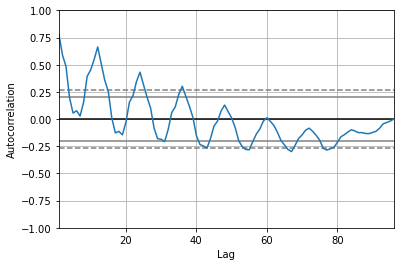

In [48]:
autocorrelation_plot(miles_df['MilesMM'])

## Feature Engineering
    --> Date Time Features
    --> Lag Features
    --> Window Features
    --> Expanding Features

### Date Time Features

In [49]:
df2.head(5)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [50]:
features = df2

In [51]:
features['year'] = df2['date'].dt.year

In [52]:
features['month'] = df2['date'].dt.month

In [53]:
features['day'] = df2['date'].dt.day

In [54]:
features.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


### Lag Features

In [55]:
features['lag1'] = df2['births'].shift(1)

In [56]:
features['lag2'] = df2['births'].shift(365)

In [59]:
features.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


### Window Features

In [61]:
features['Roll_mean'] = df2['births'].rolling(window = 2).mean()

In [62]:
features.head()

,date,births,year,month,day,lag1,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


In [63]:
features['Roll_max'] = df2['births'].rolling(window = 2).max()

In [64]:
features.head()

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,32.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,31.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


### Expanding Features

In [65]:
features['Expand_max'] = df2['births'].expanding().max()

In [67]:
features.head(10)

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,35.0,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,32.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,31.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0
5,1959-01-06,29,1959,1,6,44.0,NaN,36.5,44.0,44.0
6,1959-01-07,45,1959,1,7,29.0,NaN,37.0,45.0,45.0
7,1959-01-08,43,1959,1,8,45.0,NaN,44.0,45.0,45.0
8,1959-01-09,38,1959,1,9,43.0,NaN,40.5,43.0,45.0
9,1959-01-10,27,1959,1,10,38.0,NaN,32.5,38.0,45.0


### Resampling
    --> UpSampling
    --> Downsampling

#### Downsampling

In [68]:
quarterly_miles_df = miles_df.resample('Q', on='Month').mean()

In [69]:
 quarterly_miles_df.head()

,MilesMM,year,lag1
Month,,,
1963-03-31,6696.333333,1963.0,6502.500000
1963-06-30,8756.000000,1963.0,7902.666667
1963-09-30,10392.333333,1963.0,10286.000000
1963-12-31,7356.333333,1963.0,8335.000000
1964-03-31,7287.666667,1964.0,7023.666667


In [70]:
yearly_total_miles_df = miles_df.resample('A', on="Month").sum()

In [71]:
yearly_total_miles_df.head()

,MilesMM,year,lag1
Month,,,
1963-12-31,99603,23556,92576.0
1964-12-31,106192,23568,105617.0
1965-12-31,115431,23580,115100.0
1966-12-31,119154,23592,117807.0
1967-12-31,126515,23604,126181.0


#### Upsampling

In [72]:
upsampled_miles_df = miles_df.resample('D', on='Month').mean()

In [73]:
upsampled_miles_df.head()

,MilesMM,year,lag1
Month,,,
1963-01-01,6827.0,1963.0,NaN
1963-01-02,NaN,NaN,NaN
1963-01-03,NaN,NaN,NaN
1963-01-04,NaN,NaN,NaN
1963-01-05,NaN,NaN,NaN


In [74]:
interpolated_miles_df = upsampled_miles_df.interpolate(method='linear')

In [75]:
interpolated_miles_df.head()

,MilesMM,year,lag1
Month,,,
1963-01-01,6827.000000,1963.0,NaN
1963-01-02,6806.064516,1963.0,NaN
1963-01-03,6785.129032,1963.0,NaN
1963-01-04,6764.193548,1963.0,NaN
1963-01-05,6743.258065,1963.0,NaN


<AxesSubplot:xlabel='Month'>

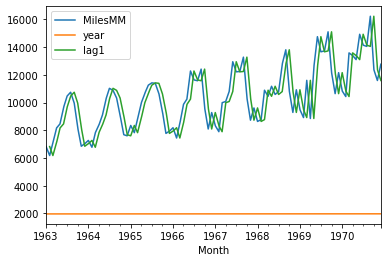

In [76]:
interpolated_miles_df.plot()

In [77]:
poly_inerpolated_miles_df = upsampled_miles_df.interpolate(method='spline', order=2)

<AxesSubplot:xlabel='Month'>

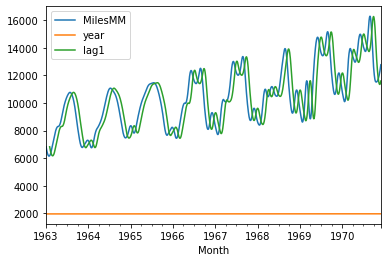

In [78]:
poly_inerpolated_miles_df.plot()

     if we have white noise we can not forecast at all


    For Random Walk We use Naive Forecasting as Model as it totally depends on previous input value and it serve as benchmark for other advanced model

### Decomposing Time Series

##### Additive Model
    y(T) = Level + Trend + Seasonlity + Noise
##### Multiplicative Model
    y(T) + Level*Trend*Seasonality*Noise

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [80]:
miles_decomp_df = pd.read_csv('../Datasets/TimeSeries/us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [81]:
miles_decomp_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [82]:
miles_decomp_df.index = miles_decomp_df['Month']

In [83]:
result = seasonal_decompose(miles_decomp_df['MilesMM'], model='additive')

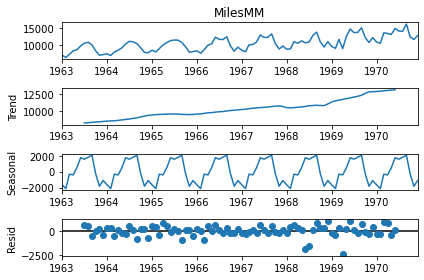

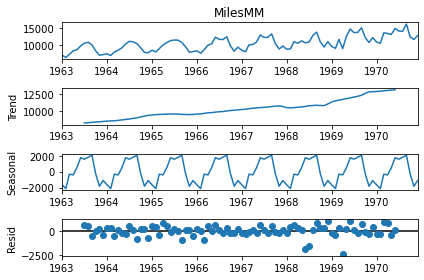

In [84]:
result.plot()

In [85]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')

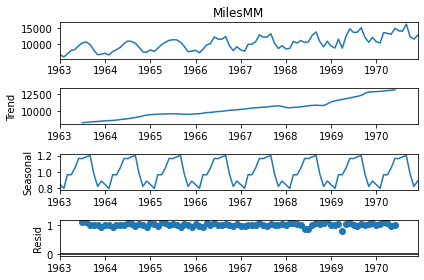

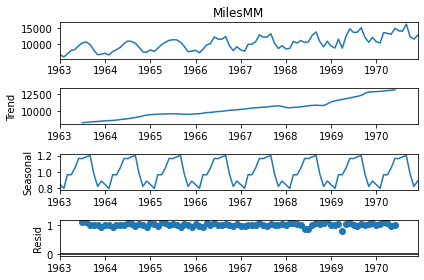

In [86]:
result2.plot()

### Differencing

In [87]:
miles_df = pd.read_csv('../Datasets/TimeSeries/us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [88]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [89]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [90]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [91]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


In [92]:
miles_df.index = miles_df['Month']

In [93]:
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')

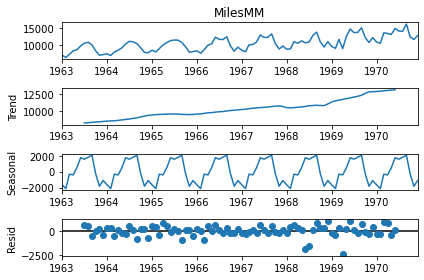

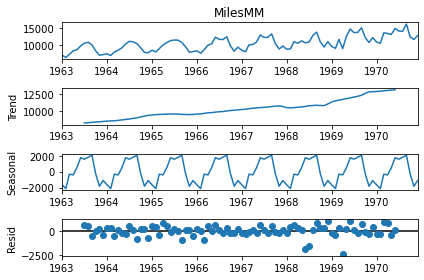

In [94]:
result_a.plot()

In [95]:
miles_df.index = miles_df['Month']

In [96]:
result_b = seasonal_decompose(miles_df.iloc[1:,3], model='additive')

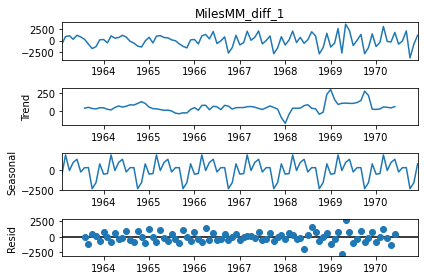

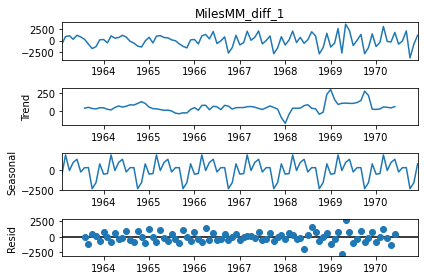

In [97]:
result_b.plot()

<AxesSubplot:xlabel='Month'>

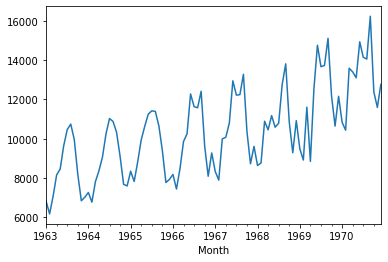

In [98]:
miles_df['MilesMM'].plot()

<AxesSubplot:xlabel='Month'>

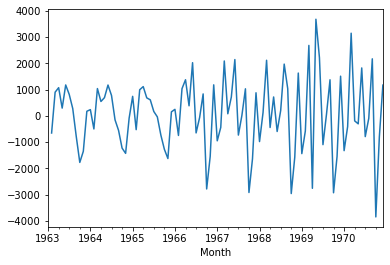

In [99]:
miles_df['MilesMM_diff_1'].plot()

In [100]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

<AxesSubplot:xlabel='Month'>

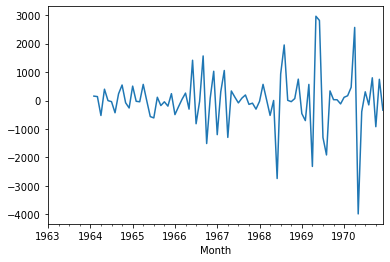

In [101]:
miles_df['MilesMM_diff_12'].plot()

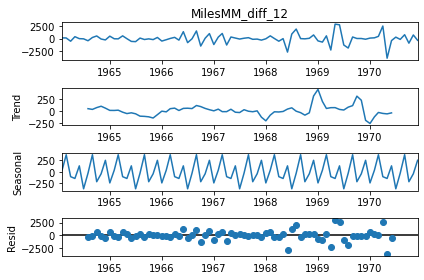

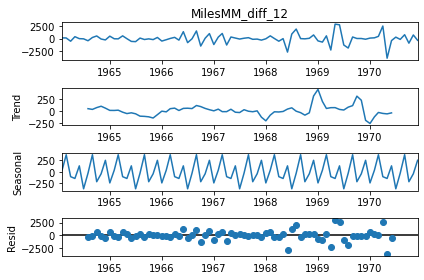

In [109]:
result_c = seasonal_decompose(miles_df.iloc[13:,4],model='additive' )
result_c.plot()

In [106]:
miles_df.head(50)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN
